In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
columns = data.columns.drop('quality')
for col in columns:
    print(data.loc[:,col].isnull().value_counts())

False    1599
Name: fixed acidity, dtype: int64
False    1599
Name: volatile acidity, dtype: int64
False    1599
Name: citric acid, dtype: int64
False    1599
Name: residual sugar, dtype: int64
False    1599
Name: chlorides, dtype: int64
False    1599
Name: free sulfur dioxide, dtype: int64
False    1599
Name: total sulfur dioxide, dtype: int64
False    1599
Name: density, dtype: int64
False    1599
Name: pH, dtype: int64
False    1599
Name: sulphates, dtype: int64
False    1599
Name: alcohol, dtype: int64


In [5]:
for col in columns:
    print(data.loc[:,col].isna().value_counts())

False    1599
Name: fixed acidity, dtype: int64
False    1599
Name: volatile acidity, dtype: int64
False    1599
Name: citric acid, dtype: int64
False    1599
Name: residual sugar, dtype: int64
False    1599
Name: chlorides, dtype: int64
False    1599
Name: free sulfur dioxide, dtype: int64
False    1599
Name: total sulfur dioxide, dtype: int64
False    1599
Name: density, dtype: int64
False    1599
Name: pH, dtype: int64
False    1599
Name: sulphates, dtype: int64
False    1599
Name: alcohol, dtype: int64


In [6]:
# NON CI SONO MISSING VALUES
data.iloc[:,:-1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
target_vc = data['quality'].value_counts()
print(target_vc)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


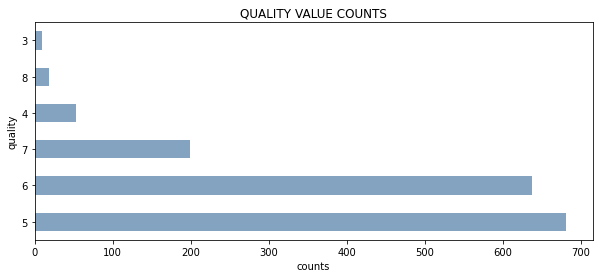

In [8]:
plt.figure(figsize = [10,4])
color = (0.2, 0.4, 0.6, 0.6)
target_vc.plot(kind = 'barh', color=color)
plt.title('QUALITY VALUE COUNTS')
plt.xlabel('counts')
plt.ylabel('quality')
plt.show()

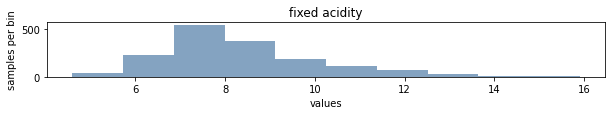

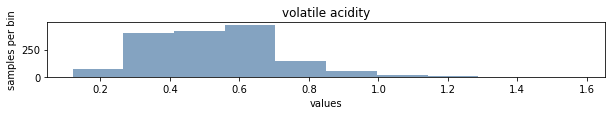

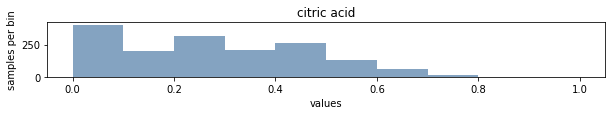

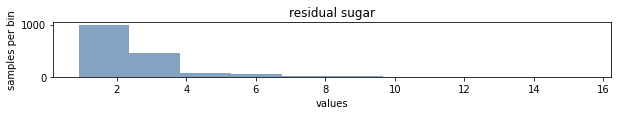

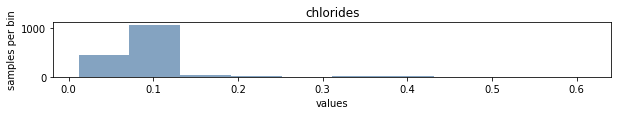

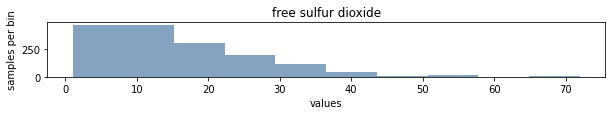

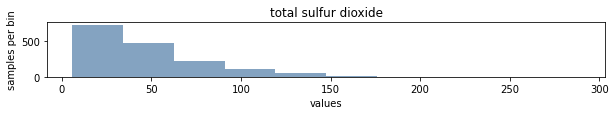

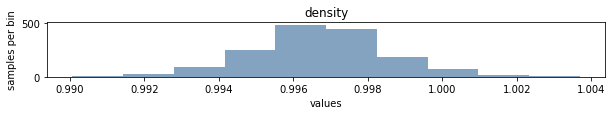

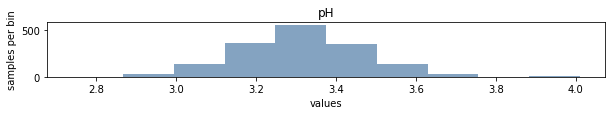

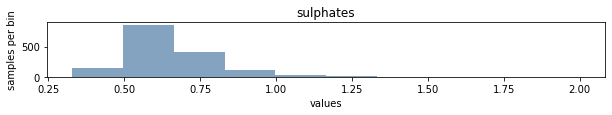

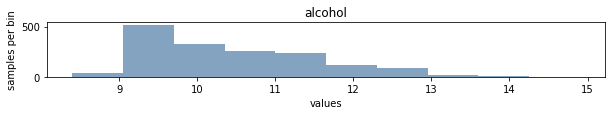

In [9]:
# Si osserva che le classi non sono composte dallo stesso numero di campioni
# Nella creazione di training set e test set per gli algoritmi di classificazione
# bisognera uniformare il numero di campioni per classe.

# CONTROLLO RISCALAMENTO DATI
for col in columns:
    plt.figure(figsize = [10,1])
    plt.hist(data[col], color = color)
    plt.title(col)
    plt.xlabel('values')
    plt.ylabel('samples per bin')
    plt.show()

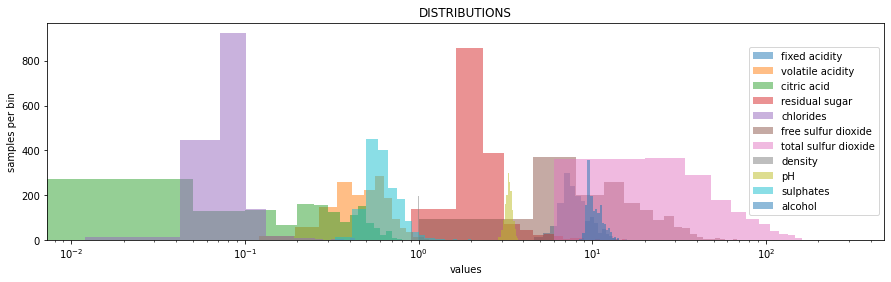

In [18]:
# dai plot è immediato osservare che non ci sono outliers, tutti i valori,
# per ogni colonna, sembrano ben distribuiti

# RISCALAMENTO DATI
# CONTROLLO RISCALAMENTO DATI
plt.figure(figsize = [15,4])
for col in data.columns[0:-1]:
    plt.hist(data[col], bins=20, alpha = 0.5)
    plt.xscale('log')
    plt.title('DISTRIBUTIONS')
    plt.xlabel('values')
    plt.ylabel('samples per bin')
plt.legend(data.columns, loc ='right')
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler as MMS
x_scaled = MMS().fit_transform(data.iloc[:,0:-1])

pp_data = data.copy()

for col,x in zip(data.columns[0:-1], x_scaled.T):
    pp_data[col] = x

pp_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


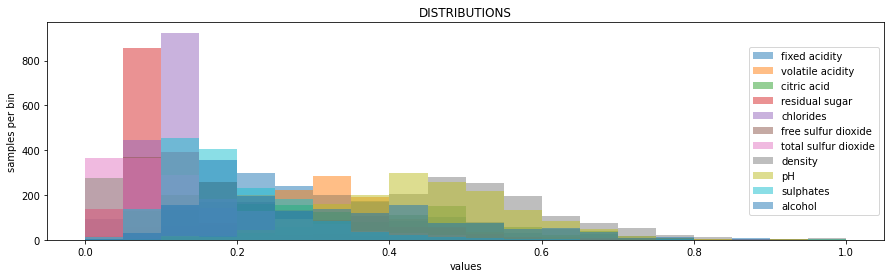

In [16]:
plt.figure(figsize = [15,4])
for col in pp_data.columns[0:-1]:
    plt.hist(pp_data[col], bins=20, alpha = 0.5)
    plt.xscale('linear')
    plt.title('DISTRIBUTIONS')
    plt.xlabel('values')
    plt.ylabel('samples per bin')
plt.legend(pp_data.columns, loc ='right')
plt.show()

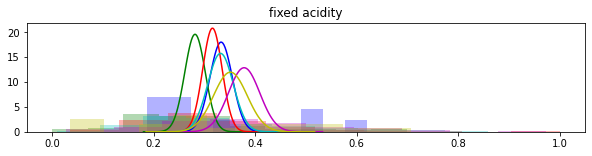

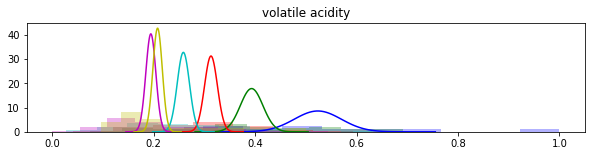

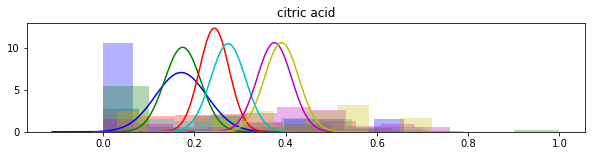

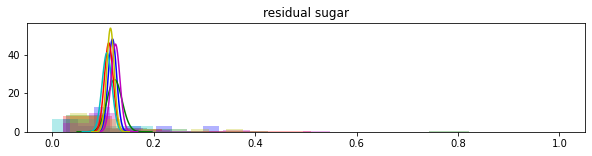

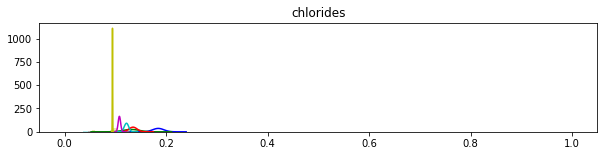

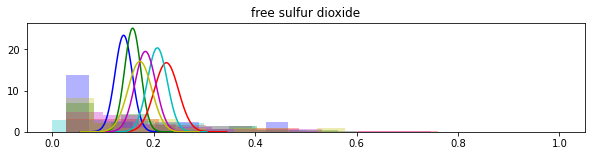

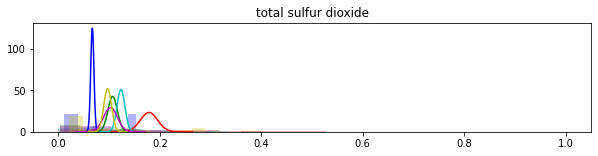

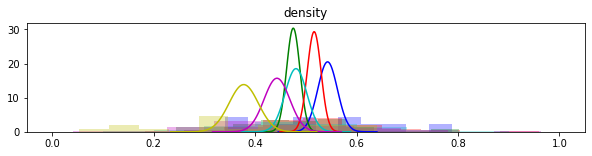

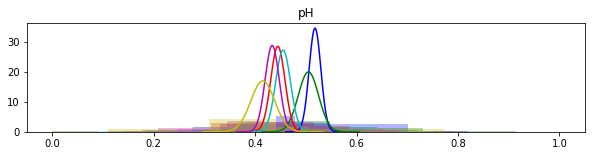

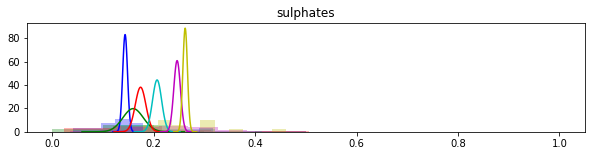

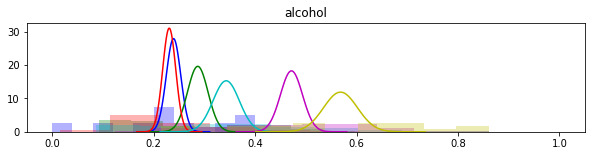

In [13]:
# SET DELLE QUALITA' DEI VINI
qualities = set(data['quality'])

# CALCOLO DI MEDIA E VARIANZA CAMPIONARIA
means = []
stds = []
idx = range(len(qualities))

datas = []

for t,i in zip(qualities,idx):
    datas.append(pp_data[pp_data['quality'] == t])
    means.append([])
    stds.append([])
    for col in data.iloc[:,0:-1].columns:
        means[i].append(np.mean(datas[i][col]))
        stds[i].append(np.var(datas[i][col]))
        
means = np.array(means).T
stds = np.array(stds).T


# PLOT DEI RISULTATI OTTENUTI CON IL PREPROCESSING
from scipy.stats import norm

colors = ['b','g','r','c','m','y']
for col,m,v in zip(data.iloc[:,0:-1].columns, means, stds):
    plt.figure(figsize = [10,2])
    plt.title(col)
    for t,i,color in zip(qualities,idx, colors):
        plt.hist(datas[i][col], density=True, color=color, alpha = 0.3)
        x = np.linspace(m[i]-5*v[i],m[i]+5*v[i],100)
        y = norm(m[i],v[i]).pdf(x)
        plt.plot(x,y, color = color)

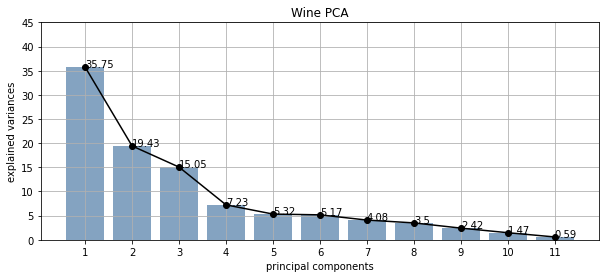

In [14]:
# VOGLIO VEDERE QUALI SONO LE COMPONENTI PRINCIPALI CHE SPIEGANO PIU VARIANZA
from sklearn.decomposition import PCA

color = (0.2, 0.4, 0.6, 0.6)

pca = PCA().fit(pp_data.iloc[:,0:-1],pp_data['quality'])

# scelta componenti principali
plt.figure(figsize = [10,4])
plt.plot(np.arange(1,12),pca.explained_variance_ratio_*100, 'ko')
plt.plot(np.arange(1,12),pca.explained_variance_ratio_*100, 'k')
for i,var in zip(range(1,12), pca.explained_variance_ratio_*100):
    plt.annotate(round(var,2),[i,var])
plt.bar(np.arange(1,12),height = pca.explained_variance_ratio_*100, color = color)
plt.grid()
plt.xlabel('principal components')
plt.xticks(np.arange(1,12))
plt.yticks(np.arange(0,50,5))
plt.ylabel('explained variances')

#plt.semilogy()
plt.title('Wine PCA')
plt.show()

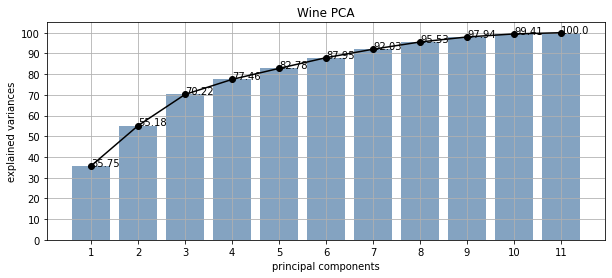

In [15]:
# controllo sulla distribuzione cumulativa
# scelta componenti principali

plt.figure(figsize = [10,4])
plt.plot(np.arange(1,12),pca.explained_variance_ratio_.cumsum()*100, 'ko')
plt.plot(np.arange(1,12),pca.explained_variance_ratio_.cumsum()*100, 'k')
for i,var in zip(range(1,12), pca.explained_variance_ratio_.cumsum()*100):
    plt.annotate(round(var,2),[i,var])
plt.bar(np.arange(1,12),height = pca.explained_variance_ratio_.cumsum()*100, color = color)
plt.grid()
plt.xlabel('principal components')
plt.xticks(np.arange(1,12))
plt.yticks(np.arange(0,110,10))
plt.ylabel('explained variances')
plt.title('Wine PCA')
plt.show()

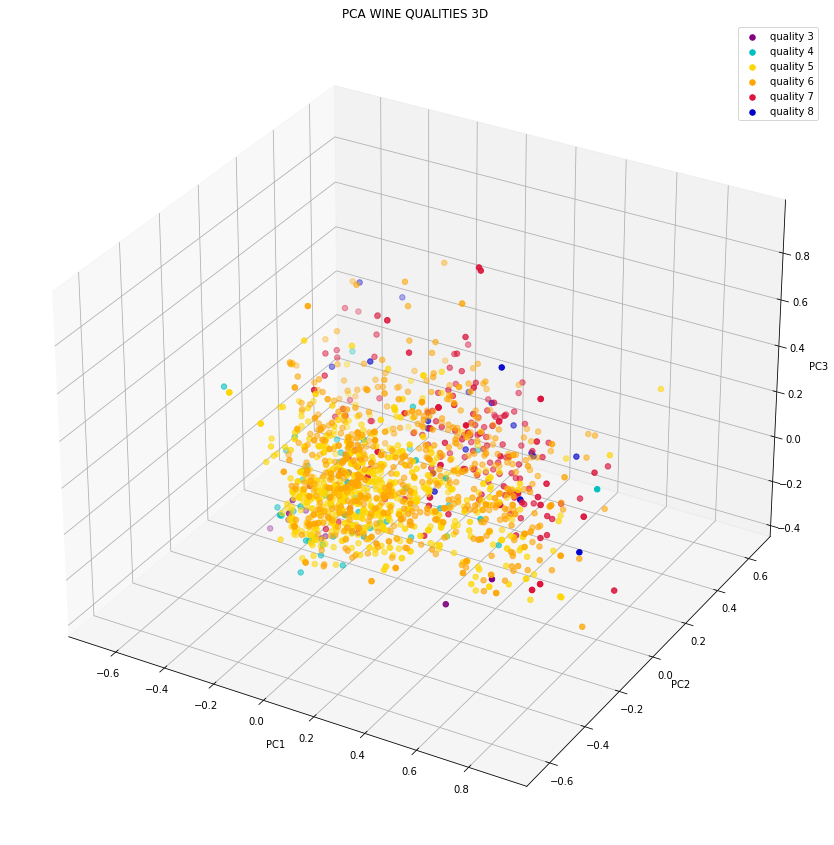

In [43]:
data_pca = pca.transform(pp_data.iloc[:,0:-1])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title('PCA WINE QUALITIES 3D')
for t,c,w in zip(qualities,['purple','c','gold','orange','crimson','mediumblue',
                           'dimgrey'],['quality 3','quality 4','quality 5','quality 6',
                                       'quality 7','quality 8']):
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.scatter(data_pca[data['quality']==t][:,0],
               data_pca[data['quality']==t][:,1],
               data_pca[data['quality']==t][:,2],
               color = c, s = 30, label = w)
ax.legend()
fig.set_size_inches(15,15)
plt.show()

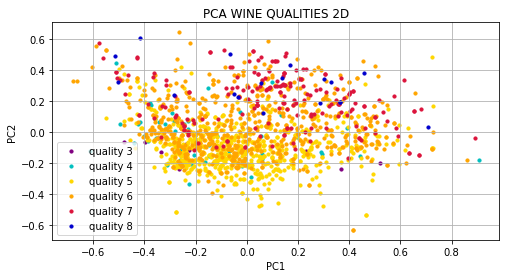

In [45]:
#2D plot
plt.figure(figsize = [8,4])
for t,c,w in zip(qualities,['purple','c','gold','orange','crimson','mediumblue',
                           'dimgrey'],['quality 3','quality 4','quality 5','quality 6',
                                       'quality 7','quality 8']):
    plt.scatter(data_pca[data['quality']==t][:,0],
                data_pca[data['quality']==t][:,1], 
                s = 10, color = c, label = w)
    plt.title('PCA WINE QUALITIES 2D')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()